# Survey Plots

TODO:
1. change indonesians to indonesian in wordcloud nationality
2. Change wordcloud colours?


CHECK with others:
1. Do you see any bachelor course that's incorrect? Like automation?
2. Maybe improve colour scheme (and general style) of all plots to fit on webpage. Potentially change spacing in histograms.
3. Do something with teacher fav colours
4. maybe split mean and std into 1st and 2nd year students?
5. I still find the prior work experience kinda interesting... maybe a circle diagram anyway? Or just a sentence saying that all but 2 have work experience
6. Improve the housing fun answers.
7. Improve the missed parties sentence
8. Improve the text on most liked things about the masters
9. The teachers most likely section (but there's no coding for that)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import statistics
from fractions import Fraction
import numpy as np

# Load the CSV data
df = pd.read_csv('../data/CLS_student_survey_answers.csv') 
print(df.columns.tolist())

#plt.style.use('Solarize_Light2')
#plt.style.use('light_background')
plt.style.use('bmh')

['Tijdstempel', 'What is your age?', 'What is your nationality or multiple nationalities? ', 'How do you identify?', "What bachelor's degree did you complete?", 'What is your prior work experience?', 'What is your favourite color?:)', 'Which study tracks are you primarily following?', 'What has been your favourite course (so far)?', "What is a course you would have liked to take, but didn't?", 'How many courses have you taken at the VU? Please answer in the following format: [courses at the VU/total number of courses at VU and UvA]. ', 'On average, how often do you go to campus (meaning any VU or UvA related workspace)?', 'When you go to campus, where do you go the most?', 'Do you have a favourite spot on campus - if so, where?', 'Do you usually bring your own lunch or buy it at campus?', "If you had to search for housing in order to study this Master's degree, what was the craziest offer you were given? And did you take it?", 'How long does it take you to go to Science Park?', 'How ma

## General statistics

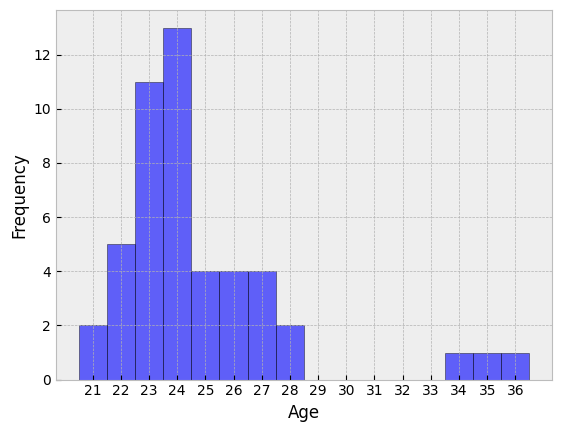

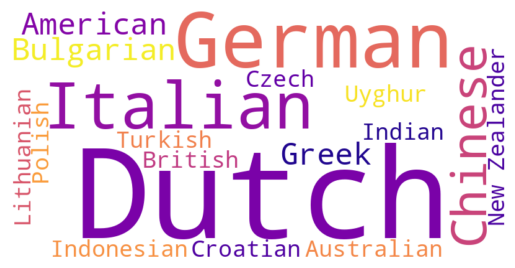

40 percent of those who answered our survey are women.


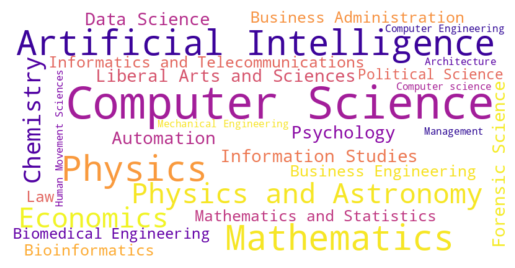

In [3]:
# AGE (histogram)
ages = df['What is your age?'].dropna().astype(int)
max_age, min_age = ages.max(), ages.min()
bins = np.arange(min_age, max_age + 2)  # +2 to include the last age bin
plt.hist(ages, bins=bins, color='blue', edgecolor='black', alpha=0.6, align='left')
plt.xticks(np.arange(min_age, max_age + 1))  # +1 to include the final age
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



# NATIONALITY (word cloud)
# Extract the nationalities from df
nationality_list = [
    nation.strip().title()
    for row in df['What is your nationality or multiple nationalities? '].dropna()
    for nation in row.split(',')
]
# Count nationality occurances
nationality_freq = Counter(nationality_list)
# Wordcloud
nationality_wc = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate_from_frequencies(nationality_freq)
plt.imshow(nationality_wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('../images/nationality_wordcloud.png', bbox_inches='tight')
plt.show()


# GENDER
'''text: 40% are women.'''
print("40 percent of those who answered our survey are women.")


# BACHELOR
bachelors_list = [
    bach.strip()
    for row in df["What bachelor's degree did you complete?"].dropna()
    for bach in row.split(',')
]
bachelor_freq = Counter(bachelors_list)
bachelor_wc = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate_from_frequencies(bachelor_freq)
plt.imshow(bachelor_wc, interpolation='bilinear')
plt.axis("off")
plt.show()


## Life related

In [3]:
# Housing
'''text: pick out fun answers

We asked the students about their housing experience. Half of the responses stated they got offered rooms for around 1000 euros a month. In turn, half of these accepted the offers from lack of other options.

One person got offered a room with no windows. Another got offered a room without access to a kitchen area for 800 euros/month (mine lol...)
Go to other countries? Agressive homeless people on the roof?
Someone's fridge was frozen over with rotting food (when they moved in).


DIVISION:
24 didn't reply or replied NA, 
14 mentioned prices within 800-1750 (of which 12 within 900-1300), 
the rest (11 people) answered something else like "crazy high offers" or "living at home" etc.
'''

'text: pick out fun answers\n\nWe asked the students about their housing experience. Half of the responses stated they got offered rooms for around 1000 euros a month. In turn, half of these accepted the offers from lack of other options.\n\nOne person got offered a room with no windows. Another got offered a room without access to a kitchen area for 800 euros/month (mine lol...)\nGo to other countries? Agressive homeless people on the roof?\nSomeone\'s fridge was frozen over with rotting food (when they moved in).\n\n\nDIVISION:\n24 didn\'t reply or replied NA, \n14 mentioned prices within 800-1750 (of which 12 within 900-1300), \nthe rest (11 people) answered something else like "crazy high offers" or "living at home" etc.\n'

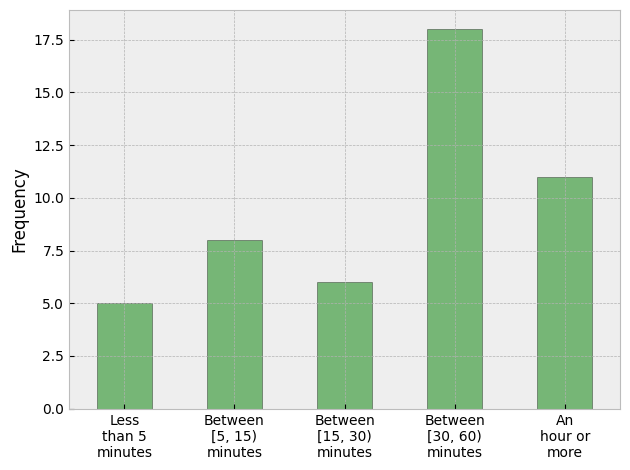

In [4]:
# Time to science park (histogram)
def label_fix(label):
    # Don't split between 2nd and 3rd words
    words = label.split()
    return '\n'.join([words[0], words[1] + ' ' + words[2], words[3]])

time = df['How long does it take you to go to Science Park?'].dropna().apply(label_fix)
time_counts = time.value_counts()

# Reorder
manual_order = ['Less\nthan 5\nminutes',
 'Between\n[5, 15)\nminutes', 'Between\n[15, 30)\nminutes',
 'Between\n[30, 60)\nminutes', 'An\nhour or\nmore']
time_counts = time_counts.reindex(manual_order).dropna()

time_counts.plot(kind='bar', color='green', edgecolor='black', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



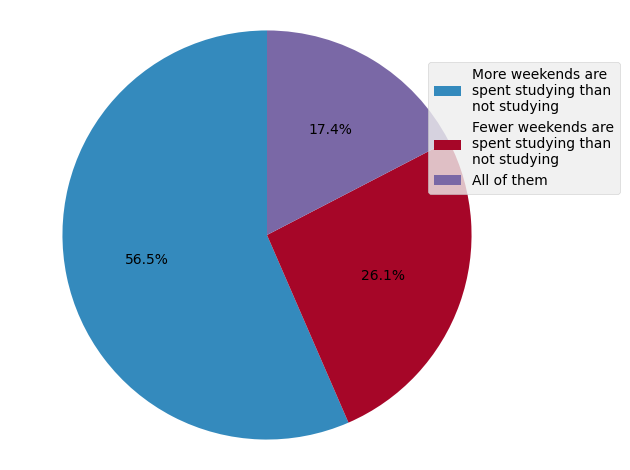

'sentence\n\nWhen asked how many parties they had missed due to studying,\nthe answers differed between "too many" and "not being a party person".\nOne person cleverly stated that they adjust their social life to their study schedule.\n\n'

In [5]:
# Weekends spent studying (circle diagram)
counts = df['How many weekends do you spend studying?'].value_counts() # Count frequency of each unique answer

# Function to wrap labels every 3 words
def wrap_label(label, words_per_line=3):
    words = label.split()
    return '\n'.join([' '.join(words[i:i+words_per_line]) for i in range(0, len(words), words_per_line)])
wrapped_labels = [wrap_label(label) for label in counts.index]
plt.pie(counts.values, autopct='%1.1f%%', startangle=90) # I removed: labels=wrapped_labels
plt.legend(wrapped_labels, bbox_to_anchor=(1,0.9), loc='upper center') # , loc='upper left'
plt.axis('equal')  # Ensures it's a perfect circle
plt.tight_layout()
plt.show()



# Parties missed
'''sentence

When asked how many parties they had missed due to studying,
the answers differed between "too many" and "not being a party person".
One person cleverly stated that they adjust their social life to their study schedule.

'''

## Program related

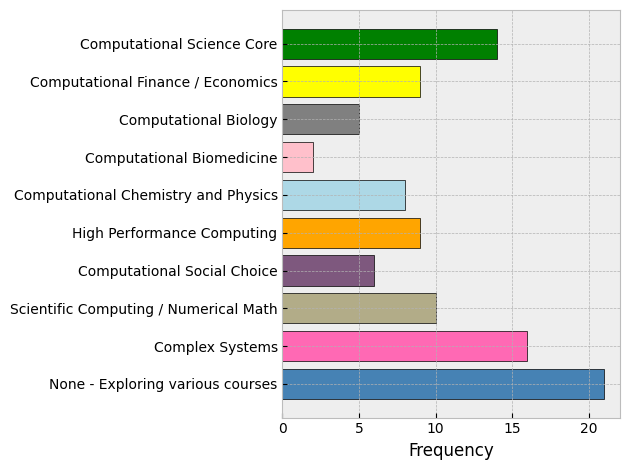

In [7]:
# Study track (histogram with the right colours as in the original)

original_order = [
    'Computational Science Core', 'Computational Finance / Economics', 'Computational Biology', 'Computational Biomedicine',
    'Computational Chemistry and Physics', 'High Performance Computing', 'Computational Social Choice', 'Scientific Computing / Numerical Math', 'Complex Systems', 'None - I am following courses I am drawn to and not sticking to a domain']

# Split the answers with ',' into individual rows
df_separated = df['Which study tracks are you primarily following?'] \
    .dropna() \
    .str.split(r'\s*,\s*') \
    .explode()
answer_counts = df_separated.value_counts()

# Reorder the answer_counts to match the original order
answer_counts = answer_counts.reindex(original_order)

# Relabeling the 'None' label
new_label = 'None - Exploring various courses'
answer_counts.index = [
    new_label if i == 'None - I am following courses I am drawn to and not sticking to a domain' else i
    for i in answer_counts.index]

# Giving colours
colors = ['green', 'yellow', 'grey', 'pink', 'lightblue', 'orange', '#7e587e', '#b2ac88', '#ff69b4', 'steelblue']

# Reverse the order because it went form last to first
answer_counts = answer_counts.iloc[::-1] 
colors = colors[::-1]

plt.barh(answer_counts.index, answer_counts.values, color=colors[:len(answer_counts)], edgecolor='black')
plt.xlabel('Frequency')
plt.tight_layout()
plt.savefig('../images/study_tracks.png', dpi=300, bbox_inches='tight')
plt.show()


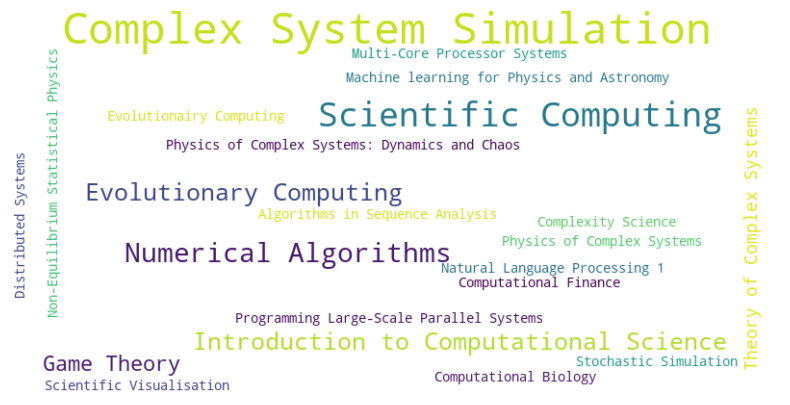

In [ ]:
# Favourite course so far (wordcloud)
fav_course_list = [
    course.strip()
    for row in df['What has been your favourite course (so far)?'].dropna()
    for course in row.split(',')
]
fav_course_freq = Counter(fav_course_list)
fav_course_wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(fav_course_freq)

plt.figure(figsize=(10, 5))
plt.imshow(fav_course_wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
# Percent of VU courses
'''percent +- st.d.'''
responses = df['How many courses have you taken at the VU? Please answer in the following format: [courses at the VU/total number of courses at VU and UvA]. '].dropna()

# Convert the dictionary to a list
fractions_list = [float(Fraction(value)) for value in responses]

mean = statistics.mean(fractions_list)
stdev = statistics.stdev(fractions_list)
print(f"Mean: {mean:.3f}, Standard Deviation: {stdev:.3f}")

Mean: 0.269, Standard Deviation: 0.236


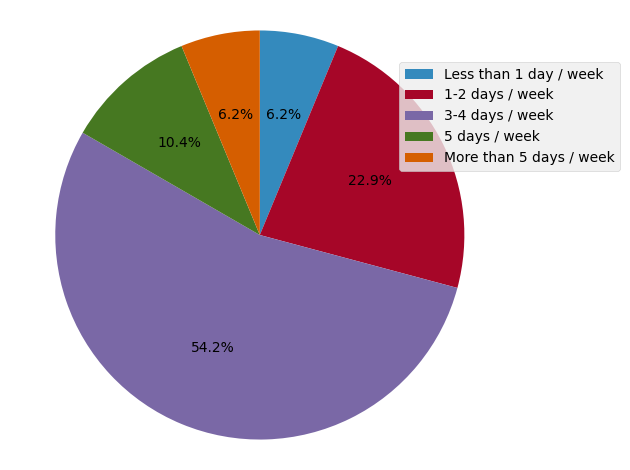

'90 percent go to Science Park.'

In [2]:
# Frequency at campus (sentence or circle diagram)
days = df['On average, how often do you go to campus (meaning any VU or UvA related workspace)?'].dropna()
days = days.str.strip()
days = days.replace({'Less than once a week': 'Less than 1 day / week'}) # rename one of the labels
counts = days.value_counts() # Count frequency of each unique answer

# Reorder the labels
manual_order = [
    'Less than 1 day / week',
    '1-2 days / week',
    '3-4 days / week',
    '5 days / week',
    'More than 5 days / week',
]
counts = counts.reindex(manual_order).dropna()

plt.figure(facecolor='white') # if we want to change the background colour
plt.pie(counts.values, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.legend(counts.index, bbox_to_anchor=(1,0.9), loc='upper center')
plt.axis('equal')  # ensures it's a perfect circle
plt.tight_layout()
plt.savefig('../images/frequency_at_campus.png', dpi=300, bbox_inches='tight')
plt.show()


# Study location: 
'''90 percent go to Science Park.'''

In [ ]:
# Most liked things about the masters:
'''
text

What seems to be a commonly appreciated thing about the master program is its broad nature. Students appreciate that the program covers various domains and that they have flexibitiy when it comes to choosing classes. They note that the skillset we learn is applicable in real life. 
Another thing that the students appreciate are the people in the program, both students and staff. They like the diversity in their collegues, that the professors seem motivated and knowledgable, and that the staff is kind and helpful. 


MOST SAID: it's broad: many disciplines and you can apply it in every domain (specific skill set but broadly applicable), real life applications
SAID QUITE A LOT: to be able to choose your own courses / flexibility
SAID ONCE: it's up to date/modern. relatively organized
SAID quite a few times actually: collegues in program and staff are nice, diversity in people, teachers are motivated
the activities uni organizes

'''


"\ntext\n\nWhat seems to be a commonly appreciated thing about the master program is its broad nature. Students appreciate that the program covers various domains and that they have flexibitiy when it comes to choosing classes. They note that the skillset we learn is applicable in real life. \nAnother thing that the students appreciate are the people in the program, both students and staff. They like the diversity in their collegues, that the professors seem motivated and knowledgable, and that the staff is kind and helpful. \n\n\nMOST SAID: it's broad: many disciplines and you can apply it in every domain (specific skill set but broadly applicable), real life applications\nSAID QUITE A LOT: to be able to choose your own courses / flexibility\nSAID ONCE: it's up to date/modern. relatively organized\nSAID quite a few times actually: collegues in program and staff are nice, diversity in people, teachers are motivated\nthe activities uni organizes\n\n"

## Fun category

Counter({'Green': 13, 'Blue': 9, 'Yellow': 6, 'Orange': 3, 'Purple': 3, 'Red': 3, 'Navy': 2, 'Pink': 2, 'Black': 2, 'Mulberry': 1, 'Crimson': 1, 'Light Blue': 1, 'Octarine': 1})


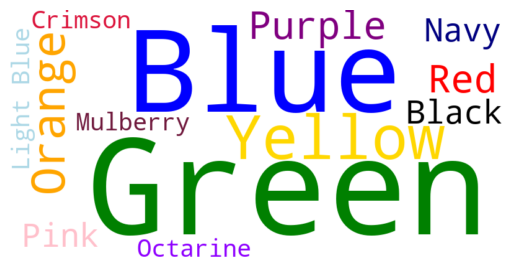

In [ ]:
# Favourite colours (wordcloud with names in their colour)
# (students)

# Extract the fav colours from df
color_list = [
    colour.strip().title()
    for row in df['What is your favourite color?:)'].dropna()
    for colour in row.split(',')
]

# Count fav colour occurances
color_freq = Counter(color_list)

# Assign a color to each word in the word cloud
color_mapping = {
    'red': 'red',
    'green': 'green',
    'blue': 'blue',
    'yellow': 'gold',
    'purple': 'purple',
    'orange': 'orange',
    'pink': 'pink',
    'black': 'black',
    'crimson': 'crimson',
    'octarine': '#8f00ff',  
    'navy': 'navy',
    'light blue': 'lightblue',
    'mulberry': '#70193d',
}
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return color_mapping.get(word.lower(), "gray")  # default to gray if word not in mapping


print(color_freq)


# Generate word cloud from frequency dictionary
wc = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate_from_frequencies(color_freq)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# (teachers)
colour_dict = {
    'Gabor': 'blue',
    'Clelia': 'blues',
    'Vitor': 'Blue',
    'Rick': '??'
    'Mike: none'
}

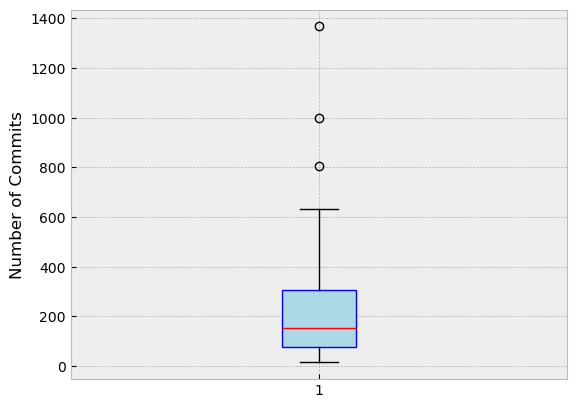

In [ ]:
# Github commits (boxplot)

# Clean and convert the column to numeric
df_numeric = df['How many GitHub commits did you make this year? To find it go to: https://github.com/YourUserName and scroll down to "x contributions in the last year".']
df_numeric = df_numeric.dropna().astype(str).str.replace(',', '').astype(float)

# Plot
plt.boxplot(df_numeric, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))
plt.ylabel("Number of Commits")
plt.show()


## Most likely to

A list of Q and the top 1 or 3 (+pic)

## 